<a href="https://colab.research.google.com/github/Musu1/Deep-Learning/blob/master/pyTorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Data Loading

In [2]:
import torchvision #This library is for using computer vision with pytorch
import torchvision.transforms as transforms
# Data set which we are using is CIFAR10 which has 32x32 size images dividede in 10 classes can be found on google. Also there is CIFAR100 which has 100 classes
#We can either download manually or use this comand to download this particular dataset
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
# Now the labels from the data would be indexes and not the names so we are manually putting them
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [0]:
# We are loading data from trainset (downloaded one) and in batch size of 4 that is everytime it will give me 4 different images
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle='True')

In [5]:
#Now I need to create an iterator to iterate over the trainloader
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(images.shape) #This would give us a batch of four images size
print(images[0].shape) # This shows length,width and height of a image
print(labels[0].item()) # This will return an index which can be inferred from classes

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
0


#Visualise data

In [6]:
img=images[0]
print(type(img))

<class 'torch.Tensor'>


In [7]:
# Now to plot we need to convert it to numpy
npimg=img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
# To plot we should have first x then y and then z so we need to transpose this numpy img
#In 3d transpose can be of 3 ways but we want x first then y and finally z
npimg=np.transpose(npimg,(1,2,0))
print(npimg.shape)

(32, 32, 3)


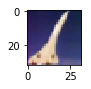

In [9]:
#Now we caan plot
plt.figure(figsize=(1,1))
plt.imshow(npimg)
plt.show()

In [0]:
#So now I can all these plotting in a fxn
def imshow(img):
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

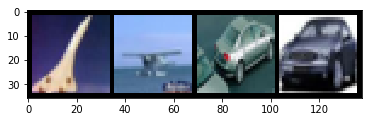

plane plane car car


In [11]:
# Now I can show in grid also

imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# Single covolutional layer

In [0]:
import torch.nn as nn

In [0]:
class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
                                                             # So here we are only defining one convolutional layer that is just pass the img through this layer and get
                                                            # output. also first parameter is depth of kernel=depth of the input and second parameter is number of output
                                                            # channel = number of different kernel we are gonna apply to img and third parameter is size of the kernel
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [0]:
net = FirstCNN()

In [18]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])